# Section 4.1: Binary classification with IMDB dataset

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)

In [3]:
print(train_data[0])
print(train_labels[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict((value, key) for (key, value) in word_index.items())
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [5]:
import numpy as np

def vectorize_sequence(sequences, dimensions = 10000):
    results = np.zeros((len(sequences), dimensions))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0
    return results

In [6]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [7]:
print(train_labels)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
print(y_train)

[1 0 0 ... 0 1 0]
[1. 0. 0. ... 0. 1. 0.]


In [8]:
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [9]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [10]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs = 20, 
                    batch_size = 512, 
                    validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 6s 369us/sample - loss: 0.5375 - accuracy: 0.7659 - val_loss: 0.3979 - val_accuracy: 0.8703
Epoch 2/20
15000/15000 [==============================] - 3s 186us/sample - loss: 0.3128 - accuracy: 0.9003 - val_loss: 0.3096 - val_accuracy: 0.8821
Epoch 3/20
15000/15000 [==============================] - 3s 188us/sample - loss: 0.2285 - accuracy: 0.9237 - val_loss: 0.2805 - val_accuracy: 0.8908
Epoch 4/20
15000/15000 [==============================] - 3s 185us/sample - loss: 0.1803 - accuracy: 0.9407 - val_loss: 0.2922 - val_accuracy: 0.8836
Epoch 5/20
15000/15000 [==============================] - 3s 189us/sample - loss: 0.1489 - accuracy: 0.9513 - val_loss: 0.2804 - val_accuracy: 0.8881
Epoch 6/20
15000/15000 [==============================] - 3s 184us/sample - loss: 0.1224 - accuracy: 0.9624 - val_loss: 0.2995 - val_accuracy: 0.8811
Epoch 7/20
15000/15000 [==========================

In [11]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


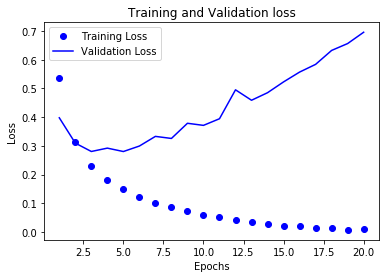

In [12]:
import matplotlib.pyplot as plt

loss = history_dict['loss']
loss_val = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label = "Training Loss")
plt.plot(epochs, loss_val, 'b', label = "Validation Loss")
plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

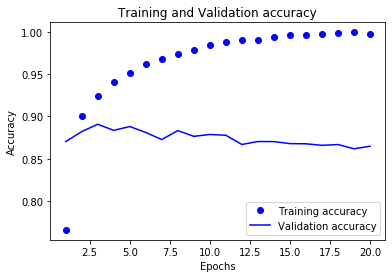

In [13]:
accuracy = history_dict['accuracy']
accuracy_val = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy, 'bo', label = "Training accuracy")
plt.plot(epochs, accuracy_val, 'b', label = "Validation accuracy")
plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

## This is a overfitting model!!! -> train another one with 4 epochs

In [14]:
model = keras.Sequential([
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.fit(partial_x_train, 
          partial_y_train, 
          epochs = 4,
          batch_size = 512,
          validation_data = (x_val, y_val)
         )
results = model.evaluate(x_test, y_test, verbose = 0)
results

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 5s 311us/sample - loss: 0.5180 - accuracy: 0.7825 - val_loss: 0.3822 - val_accuracy: 0.8691
Epoch 2/4
15000/15000 [==============================] - 3s 209us/sample - loss: 0.3033 - accuracy: 0.9034 - val_loss: 0.3284 - val_accuracy: 0.8673
Epoch 3/4
15000/15000 [==============================] - 3s 208us/sample - loss: 0.2218 - accuracy: 0.9275 - val_loss: 0.2952 - val_accuracy: 0.8825
Epoch 4/4
15000/15000 [==============================] - 3s 194us/sample - loss: 0.1763 - accuracy: 0.9417 - val_loss: 0.2745 - val_accuracy: 0.8897


[0.2920541336727142, 0.88276]